In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Read the Fashion MNIST dataset from its library
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


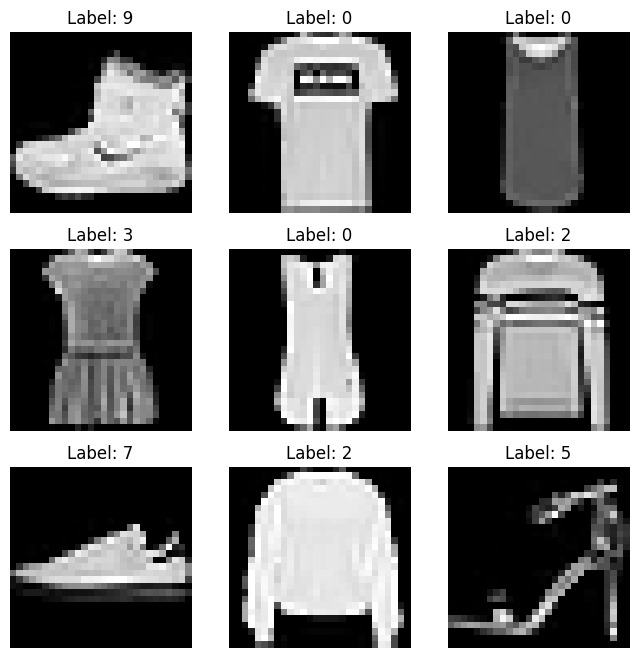

In [3]:
# Step 2: Preprocess the data
# Display a sample of the data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y[i]}')
plt.show()

In [4]:
# Step 3: Normalize the data
X = X / 255.0

In [5]:
# Step 4: Separate training and test data with a ratio of 80 to 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Use the decision tree algorithm and train the model using the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy with model: {train_accuracy:.4f}')
print(f'Testing accuracy with model: {test_accuracy:.4f}')

Training accuracy with model: 1.0000
Testing accuracy with model: 0.7940


In [8]:
# Step 6: Use cross-validation on the training data and report the average error of the algorithm
cv_error = 1 - cross_val_score(dt, X_train, y_train, cv=5).mean()
print(f'Average cross-validation error: {cv_error:.4f}')

Average cross-validation error: 0.2117


In [10]:
# Step 7: Tune hyperparameters using GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [14]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [11]:
# Step 8: Calculate and report the accuracy of the training data with the best selected model by optimizing hyperparameters
best_dt = grid_search.best_estimator_
y_train_pred = best_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy with best model: {train_accuracy:.4f}')

Training accuracy with best model: 0.8417


In [12]:
# Step 9: Show accuracy values for the algorithm on test and training data in a graph
best_dt.fit(X_train, y_train)  # Refit the model on the entire training data
y_test_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy with best model: {train_accuracy:.4f}')
print(f'Testing accuracy with best model: {test_accuracy:.4f}')

Training accuracy with best model: 0.8417
Testing accuracy with best model: 0.8080


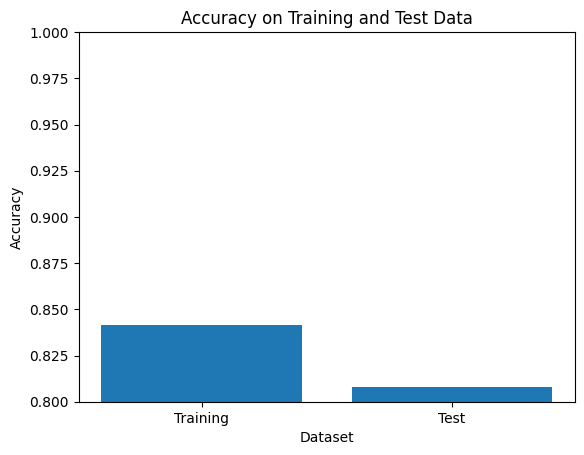

In [13]:
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy on Training and Test Data')
plt.ylim([0.8, 1.0])
plt.show()